# Кластеризация методом `K-means` для выделения групп объектов

В этой задаче будет рассмотрен метод кластеризации <code>K-means</code> для решения непосредственно задачи кластеризации — задачи выделения схожих структур в данных. Работать будем с известным набором данных <a href="http://yann.lecun.com/exdb/mnist/"><code>MNIST</code></a>.

Загрузим набор данных. Будем использовать только тестовую часть оригинального набора, чтобы сократить время обучения моделей.

In [3]:
from keras.datasets import mnist
import warnings
warnings.filterwarnings("ignore")

(_,_), (X, y) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Пример вывода нескольких объектов и соответствующих меток классов:

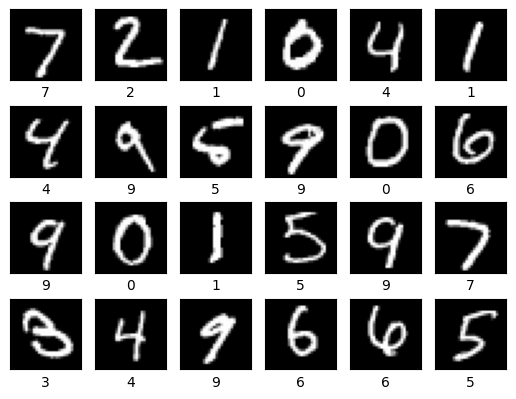

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(X[i], cmap='gray')
    axi.set(xticks=[], yticks=[])
    axi.set_xlabel(y[i],
                   color='black')

Введите <code>.shape</code> полученного набора данных

In [5]:
X.shape

(10000, 28, 28)

При помощи <code>train_test_split</code> разобейте полученный набор данных на тренеровочную и тестовую выборки с параметрами, указанными в вашем варианте.

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train0, X_test0, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

X_train = []
for i in range(len(X_train0)):
  X_train.append((X_train0[i]).flatten())

X_test = []
for i in range(len(X_test0)):
  X_test.append((X_test0[i]).flatten())

Давайте, раз речь идет об известном наборе данных, заставим <code>K-means</code> искать $10$ групп объектов.

«Распрямите» изображения и обучите алгоритм <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>KMeans</code></a> с параметрами, указанными в вашем задании.

In [7]:
from sklearn.cluster import KMeans

km = KMeans(random_state=21, n_clusters=10)
km.fit(X_train, y_train)

X_new = km.transform(X_train)

Определите чило элементов, отнесенных к кластеру, указанному в вашем задании

In [8]:
import pandas as pd

nums = [np.sum(km.labels_ == i) for i in range(10)]
nums

[634, 735, 699, 612, 932, 1003, 1007, 778, 889, 711]

Постройте изображения, соответствующие центроидам полученных кластеров. Для этого `reshape`ните координаты центроидов до размера $28 \times 28$ и постройте полученную матрицу, например, в черно-белых оттенках.



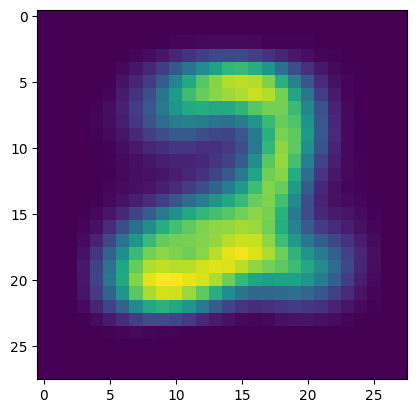

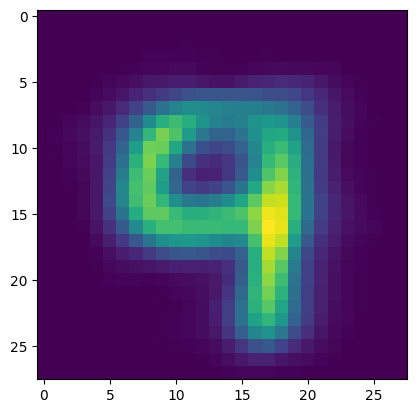

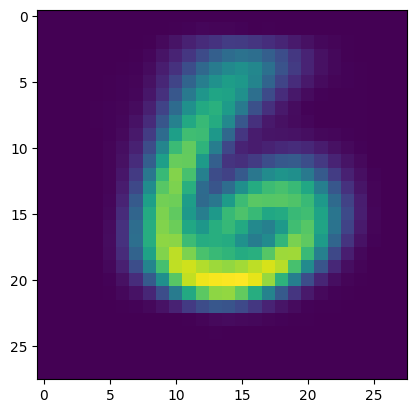

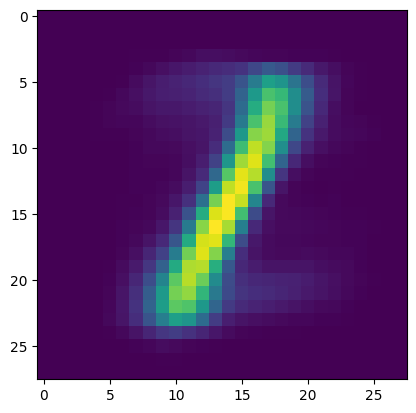

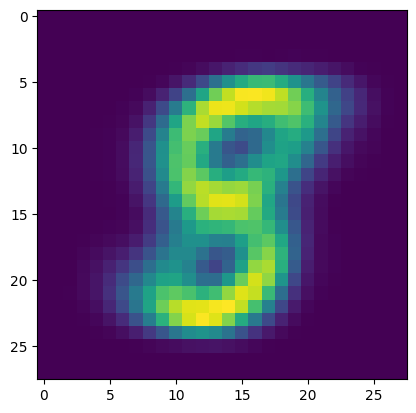

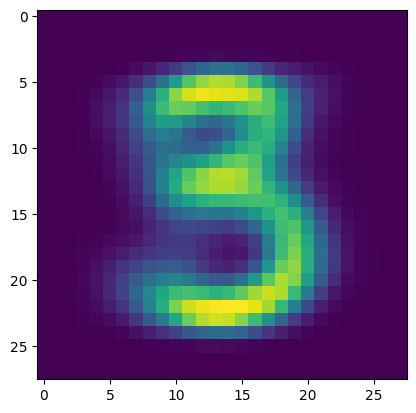

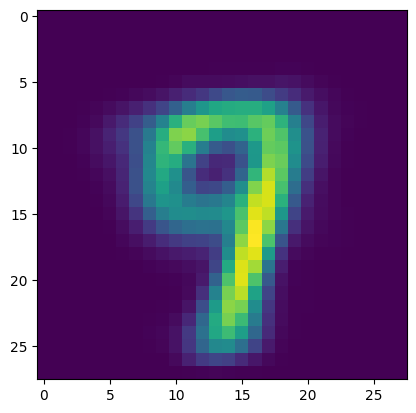

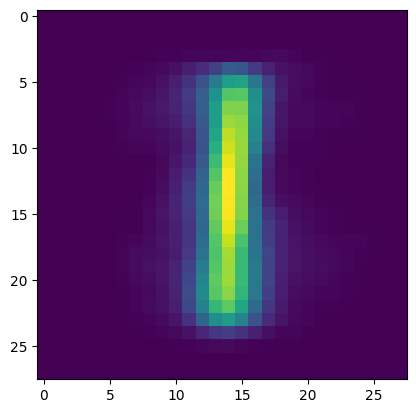

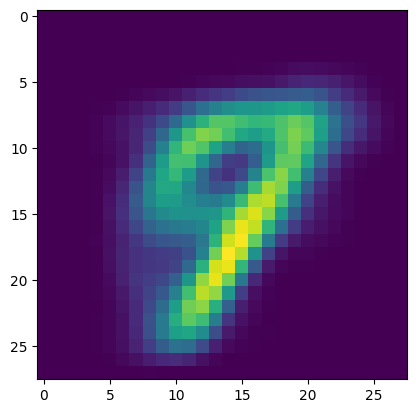

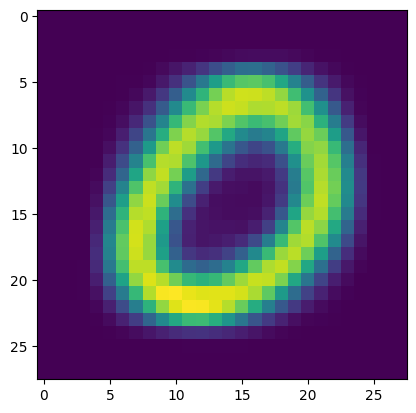

In [9]:
import seaborn as sns

centroids = km.cluster_centers_

# centroids = []
# for i in range(10):
#   cent = np.array([0 for k in range(784)])
#   for j in range(len(X_train)):
#     if y[j] == i:
#       cent = cent + np.array(X_train[j])
#   cent = cent/nums[i]
#   centroids.append(cent)

# for i in range(len(centroids)):
#   centroids[i] = centroids[i].reshape(28,28)

# fig, ax = plt.subplots(1, 10)
# for i, axi in enumerate(ax.flat):
#     axi.imshow(centroids[i], cmap='gray')
#     axi.set(xticks=[], yticks=[])
#     axi.set_xlabel(i,color='black')

for i in range(10):
  plt.figure()
  plt.imshow(centroids[i].reshape(28,28))

Можно заметить, что получившиеся картинки весьма походят на рукописные цифры. Впрочем, кластеризация прошла не без накладок. Предположите, какие цифры могут быть перепутаны и каких не хватает.

Так как получившиеся кластеры ничего не знают о природе кластеризумых объектов, метки кластеров могут отличаться от «разумных меток». Восстановите правильные метки, используя следующие соображения: кластеру присваивается метка тех цифр, представителей которых в кластере большинство. Действительно ли это помогло восстановить справедливость?

Введите полученные метки кластеров после преобразования и сравните с ранее построенными изображениями на основе центроидов. Подтверждаются ли ваши догадки фактами?

In [10]:
X_res = pd.DataFrame(X_train)

In [11]:
X_res['label'] = km.labels_
X_res['real_label'] = y_train
X_res.groupby(['label'])['real_label'].agg(pd.Series.mode)

label
0    2
1    4
2    6
3    1
4    8
5    3
6    7
7    1
8    7
9    0
Name: real_label, dtype: uint8

Разумно оценить что-то вроде точности. Считая, что все объекты кластера имеют ту же метку, что и сам кластер, сравните эти метки с истинными метками. Вычислите <code>accuracy</code>. Рекомендуем использовать функцию <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html"><code>accuracy_score</code></a> из библиотеки <code>sklearn</code>.

In [12]:
from sklearn.metrics import accuracy_score

pred = []
for i in range(len(km.labels_)):
  if km.labels_[i] == 0:
    pred.append(2)
  elif km.labels_[i] == 1:
    pred.append(4)
  elif km.labels_[i] == 2:
    pred.append(6)
  elif km.labels_[i] == 3:
    pred.append(1)
  elif km.labels_[i] == 4:
    pred.append(8)
  elif km.labels_[i] == 5:
    pred.append(3)
  elif km.labels_[i] == 6:
    pred.append(7)
  elif km.labels_[i] == 7:
    pred.append(1)
  elif km.labels_[i] == 8:
    pred.append(7)
  elif km.labels_[i] == 9:
    pred.append(0)

accuracy_score(y_train, pred)

0.589875

При помощи метода <code>.predict()</code> произведите кластеризацию тестовых данных. Переименуйте метки предсказанных кластеров на основе полученного для тренировочного набора данных преобразования.

In [13]:
ans = km.predict(X_test)

pred = []
for i in range(len(ans)):
  if ans[i] == 0:
    pred.append(2)
  elif ans[i] == 1:
    pred.append(4)
  elif ans[i] == 2:
    pred.append(6)
  elif ans[i] == 3:
    pred.append(1)
  elif ans[i] == 4:
    pred.append(8)
  elif ans[i] == 5:
    pred.append(3)
  elif ans[i] == 6:
    pred.append(7)
  elif ans[i] == 7:
    pred.append(1)
  elif ans[i] == 8:
    pred.append(7)
  elif ans[i] == 9:
    pred.append(0)

accuracy_score(y_test, pred)

0.593

Постройте матрицу ошибок.

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[164,   0,   1,  13,   0,   0,   7,   9,  12,   0],
       [  0, 213,   0,   0,   0,   0,   0,   0,   0,   0],
       [  1,  26, 146,   9,   6,   0,   5,   7,   6,   0],
       [  0,  15,  11, 140,   5,   0,   1,   4,  32,   0],
       [  0,   7,   0,   0,  73,   0,   3,  91,   0,   0],
       [  1,  14,   0,  63,   5,   0,   2,  37,  64,   0],
       [  4,   8,   2,   0,   6,   0, 154,   0,  10,   0],
       [  1,  18,   2,   0,  21,   0,   0, 183,   0,   0],
       [  4,  16,   3,  34,   4,   0,   5,  21, 113,   0],
       [  0,   2,   0,   2,  56,   0,   0, 135,   3,   0]])

С какой цифрой построенная модель чаще всего путала цифру, указанную в вашем варианте?

In [15]:
7

7

Вычислите точность модели на тестовых данных.

In [ ]:
# < ENTER YOUR CODE HERE >

Интересно отметить, что мы построили классификатор на основе кластеризации при том, что никакими «правильными ответами» мы не пользовались (разве что для оценки).

А сколько кластеров кажется оптимальным количеством, если использовать каменистую осыпь? Постройте график каменистой осыпи для числа кластеров от $7$ до $16$. Можно ли уверенно определить оптимальное число кластеров?

In [ ]:
# < ENTER YOUR CODE HERE >

Все эти обучения черезчур уж долгие. Давайте сделаем «ход конем» и понизим размерность данных, пытаясь сохранять расстояния между объектами. Посмотрим, как это скажется на скорости и точности.

Преобразуйте <b>тренировочный набор</b> данных при помощи метода <a href="https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html"><code>TSNE</code></a> из библиотеки <code>sklearn</code>. Используйте параметры, указанные в вашем задании.

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state=21)
X_emb = tsne.fit_transform(np.array(X_train))

Произведите кластеризацию полученного набора данных при помощи <code>KMeans</code> с параметрами, указанными в вашем задании. Аналогично проделанному раньше переназначьте метки кластеров на основе метки большинства объектов в рамках кластера. Оцените точность модели на <b>тренировочных данных</b>.

In [30]:
km = KMeans(random_state=21, n_clusters=10)
km.fit(X_emb, y_train)

# X_res = pd.DataFrame(X_emb)
# X_res['label'] = km.labels_
# X_res['real_label'] = y_train
# X_res.groupby(['label'])['real_label'].agg(pd.Series.mode)

pred = []
for i in range(len(km.labels_)):
  if km.labels_[i] == 0:
    pred.append(7)
  elif km.labels_[i] == 1:
    pred.append(3)
  elif km.labels_[i] == 2:
    pred.append(0)
  elif km.labels_[i] == 3:
    pred.append(8)
  elif km.labels_[i] == 4:
    pred.append(6)
  elif km.labels_[i] == 5:
    pred.append(4)
  elif km.labels_[i] == 6:
    pred.append(2)
  elif km.labels_[i] == 7:
    pred.append(5)
  elif km.labels_[i] == 8:
    pred.append(9)
  elif km.labels_[i] == 9:
    pred.append(1)

accuracy_score(y_train, pred)

0.8235

Проблема, однако, известна. `t-SNE` — метод, который не дает правила получения проекций многомерного пространства на, например, двумерное. Тем самым, при появлении новых данных, проекции придется искать заново.

В то же время, еще раз хочется подчеркнуть, как обучение без учителя позволило построить классификатор, который, как будто бы, является результатом решения задачи обучения с учителем.